In [70]:
%matplotlib widget
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

In [71]:
# Simple differential equation solver for ODEs
# def y_prime(t, y):
#     return (3-4*y)/2*t
# exm = spi.solve_ivp(
#     fun=y_prime,
#     t_span=(0.0, 5.0),
#     y0=[0.0],
#     method='Radau',
#     max_step=1e-5,
#     rtol=1e-6,
#     atol=1e-8
# )
# print(exm)
# plt.plot(exm.t, exm.y[0])
# plt.show()

In [72]:
# constants
N = 16                      # input dimension
f = 1000.0                  # Hz
tau = 2e-3                  # seconds (20 ms)
T = 5.0                     # total simulation time (s)
dt_sample = 1e-5                  
thetas = np.random.uniform(low=0, high=2*np.pi, size=N)  # random phases
omega = 2 * np.pi * f
w0 = np.random.randn(N) * 0.01
print(w0)

[ 0.00481804 -0.00083358  0.00421497  0.00490899  0.00714517 -0.01570865
 -0.01060429 -0.01733117  0.01930924 -0.00496154  0.000409    0.00229252
 -0.0113401   0.00149612  0.00093767 -0.00221513]


In [73]:
def x_of_t(t):
    return np.cos(omega*t + thetas)
def wdot(t, w):
    x = x_of_t(t)
    y = float(np.dot(w, x))
    return (y * x - (y**2) * w) / tau

In [78]:
t_eval = np.arange(0.0, T + dt_sample, dt_sample)

sol = spi.solve_ivp(
    fun=wdot,
    t_span=(0.0, T),
    y0=w0,
    method='Radau',
    max_step=dt_sample,
    rtol=1e-6,
    atol=1e-8
)
print(sol)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-05 ...  5.000e+00  5.000e+00]
        y: [[ 4.818e-03  4.822e-03 ... -3.162e-01 -3.159e-01]
            [-8.336e-04 -8.291e-04 ... -3.217e-01 -3.216e-01]
            ...
            [ 9.377e-04  9.424e-04 ... -3.207e-01 -3.207e-01]
            [-2.215e-03 -2.219e-03 ...  3.160e-01  3.156e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 4300774
     njev: 29973
      nlu: 620372


In [79]:
W = sol.y.T
val = [np.dot(W[n], x_of_t(sol.t[n])) for n in range(len(sol.t))]
skip = max(1, len(sol.t) // 2000)
X = np.cos(omega * sol.t[:, None] + thetas[None, :])

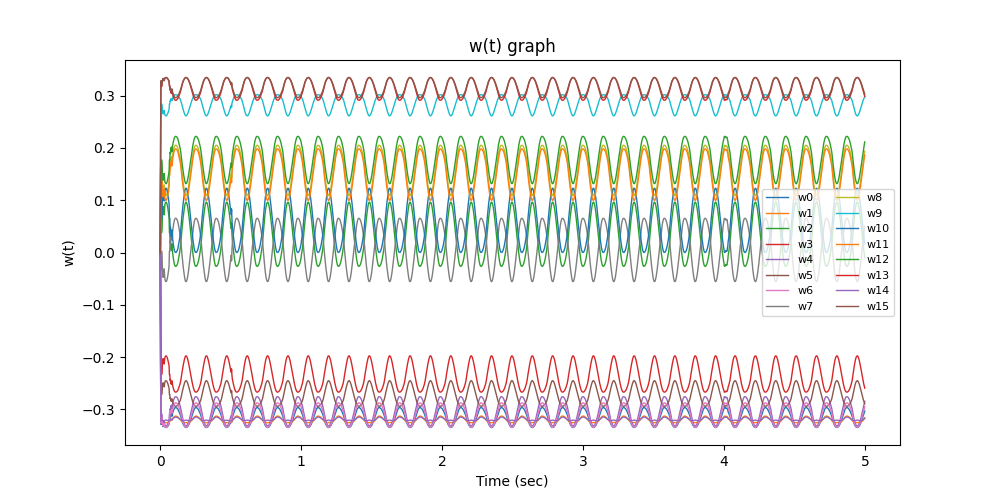

In [80]:
plt.figure(figsize=(10,5))
for j in range(N):
    plt.plot(sol.t[::skip], sol.y[j, ::skip], label=f"w{j}",linewidth=1)
plt.xlabel("Time (sec)")
plt.ylabel("w(t)")
plt.title("w(t) graph")
plt.legend(ncol=2, fontsize=8)

plt.show()

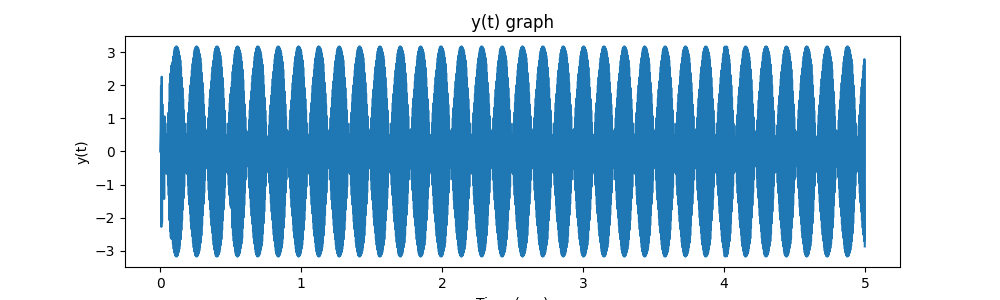

In [81]:
plt.figure(figsize=(10,3))
plt.plot(sol.t[::skip], np.array(val)[::skip])
plt.xlabel("Time (sec)")
plt.ylabel("y(t)")
plt.title("y(t) graph")

plt.show()